## DynamoDB Intro Workbook ##

This workbook will walk through the basics of getting started on DynamoDB. It is intended to demostrate the basic API building blocks that can then be combined for complex modeling (in subsequent labs). This lab uses Python 3 and the native DynamoDB SDK, and all setup and code samples are demostrated.

Let's get started! 

DynamoDB is a fast serverless scalable key-value and document database hosted on AWS.

The basic functional abstraction when using DynamoDB is a Table. A table requires a base index. An index can be a simple primary key, which consists of just a partition key (for 1:1 modeling of key-value data models. Or a compound primary key, which is created using partition and sort keys (for 1:n modeling for parent-child relationships of related items).

<em>Since we are running on a Sagemaker notebook the AWS Boto3 SDK is pre-installed. If you are running this on another Jupyter notebook you may need to install boto3. This can be done by running:</em>  

In [2]:
#Run if Boto3 is not installed on notebook
import sys  
!pip3 install boto3 --user

    100% |████████████████████████████████| 133kB 7.6MB/s eta 0:00:01
    100% |████████████████████████████████| 71kB 10.9MB/s ta 0:00:01
    100% |████████████████████████████████| 5.6MB 255kB/s eta 0:00:01
    100% |████████████████████████████████| 552kB 2.5MB/s eta 0:00:01
    100% |████████████████████████████████| 153kB 8.5MB/s eta 0:00:01
    100% |████████████████████████████████| 235kB 5.7MB/s eta 0:00:01


So, let's create our first table. Update the 'Name' value below with your initials and run the below code.

In [3]:
import boto3
import json

Name='dy11-RecipeTable'

# Get the service resource.
#dynamodb = boto3.resource('dynamodb', region_name = 'us-east-1')
client = boto3.client('dynamodb', region_name = 'us-east-1')

print('submitting table creation request... this may take a minute or two')

# Create the DynamoDB table.
response = client.create_table(
    TableName=Name,
    KeySchema=[
        {
            'AttributeName': 'RecipeName',
            'KeyType': 'HASH'
        },
        {
            'AttributeName': 'Ingredients',
            'KeyType': 'RANGE'
        }
    ],
    AttributeDefinitions=[
        {
            'AttributeName': 'RecipeName',
            'AttributeType': 'S'
        },
        {
            'AttributeName': 'Ingredients',
            'AttributeType': 'S'
        },
    ],
    ProvisionedThroughput={
        'ReadCapacityUnits': 5,
        'WriteCapacityUnits': 5
    }
)

# Wait until the table exists.
client.get_waiter('table_exists').wait(TableName=Name)

# Print out some data about the table.
response = client.describe_table(TableName=Name)

print(json.dumps(response, indent=1, default=str))
print("Table is active...")

submitting table creation request... this may take a minute or two
{
 "Table": {
  "AttributeDefinitions": [
   {
    "AttributeName": "Ingredients",
    "AttributeType": "S"
   },
   {
    "AttributeName": "RecipeName",
    "AttributeType": "S"
   }
  ],
  "TableName": "dy11-RecipeTable",
  "KeySchema": [
   {
    "AttributeName": "RecipeName",
    "KeyType": "HASH"
   },
   {
    "AttributeName": "Ingredients",
    "KeyType": "RANGE"
   }
  ],
  "TableStatus": "ACTIVE",
  "CreationDateTime": "2019-08-01 20:10:33.166000+00:00",
  "ProvisionedThroughput": {
   "NumberOfDecreasesToday": 0,
   "ReadCapacityUnits": 5,
   "WriteCapacityUnits": 5
  },
  "TableSizeBytes": 0,
  "ItemCount": 0,
  "TableArn": "arn:aws:dynamodb:us-east-1:262057394961:table/dy11-RecipeTable",
  "TableId": "8f99cc35-459d-4377-8904-39f430985d9f"
 },
 "ResponseMetadata": {
  "RequestId": "82HMUV5IB4JSSCLHMF61FAQR3JVV4KQNSO5AEMVJF66Q9ASUAAJG",
  "HTTPStatusCode": 200,
  "HTTPHeaders": {
   "server": "Server",
   "dat


Now, what did we just do? 

We created our first DynamoDB table called YourInitials-Recipes. We set the partition key to the Recipe Name and the sort key to the ingredients. While it doesn't have data yet, this table could look like:
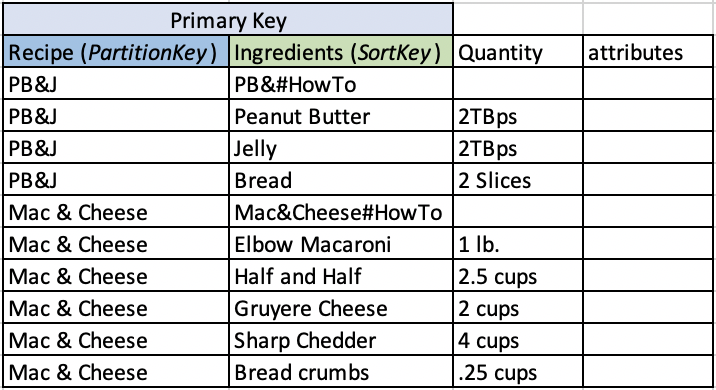